<h2><center><b><i>Cluster bomb</b></i>: Uncovering Patterns in Terrorist Group Beliefs and Attacks</center></h2>

#### **COM-480: Data Visualization**

**Team**: Alexander Sternfeld, Silvia Romanato & Antoine Bonnet

**Dataset**: [Global Terrorism Database (GTD)](https://www.start.umd.edu/gtd/) 

**Additional dataset**: [Profiles of Perpetrators of Terrorism in the United States (PPTUS)](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl%3A1902.1/17702)

## **Terrorist ideologies**

In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from load_data import *

pd.set_option('display.max_columns', None)

GTD = load_GTD()
PPTUS_data, PPTUS_sources = load_PPTUS()

GTD pickle file found, loading...
PPTUS pickle files found, loading...


In [259]:
PPTUS_data.rename(columns={'DOM_I': 'dominant_ideology'}, inplace=True)

# 'I_ETHNO': 'ethno_nationalist',  'I_REL': 'religious', 'I_RACE':  'racist', 'I_LEFT': 'extreme_left' , 'I_RIGHT':  'extreme_right''G_POL_1':  'politic_reasons', 'G_SOC_1':  'social_reasons','G_ECO_1': 'economic_reasons', 'G_REL_1':  'religious_reasons'

In [4]:
print('The shape of PPTUS_data is: ', PPTUS_data.shape, '\nThe shape of PPTUS_sources is: ' ,PPTUS_sources.shape,'\nThe shape of GTD is:', GTD.shape)

The shape of PPTUS_data is:  (145, 428) 
The shape of PPTUS_sources is:  (928, 3) 
The shape of GTD is: (214666, 135)


merging the two datasets on the groups

In [258]:
# Merge PPTUS and GTD 
df = PPTUS_data.merge(GTD, left_on='ORGNAME', right_on='gname', how= 'inner')
print('the number of attacks of which we know the organization ideology from the PPTUS dataframe are: ', df.shape[0], ', while before where: ', GTD.shape[0])


the number of attacks of which we know the organization ideology from the PPTUS dataframe are:  7131 , while before where:  214666


In [188]:
# replace all the -99 with NaN
df.replace(-99, 0, inplace=True)

In [189]:
# rename the dominant_ideology row from the number to the ideology name in the df dataframe
df['dominant_ideology'] = df['dominant_ideology'].replace({1: 'extreme_right', 2: 'extreme_left', 3: 'religious', 4: 'ethno_nationalist', 5: 'single_issue', -99: 'uncertain'})

ethno_col = df.columns[df.columns.str.startswith('I_ETHNO') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE') & ~df.columns.str.endswith('I_ETHNO')]
rel_col = df.columns[df.columns.str.startswith('I_REL') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE') & ~df.columns.str.endswith('I_REL')]
race_col = df.columns[df.columns.str.startswith('I_RACE') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE') & ~df.columns.str.endswith('I_RACE')]
left_col = df.columns[df.columns.str.startswith('I_LEFT') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE') & ~df.columns.str.endswith('I_LEFT')]
right_col = df.columns[df.columns.str.startswith('I_RIGHT') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE') & ~df.columns.str.endswith('I_RIGHT')]
si_col = df.columns[df.columns.str.startswith('I_SI') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE') & ~df.columns.str.endswith('I_SI')]


## Program:

### There are nice info in the GTD about:
- suicide
- multiple
- attacktype1_txt
- nkill

### There are nice info in the PPTUS about:
- ideologies
- sub-ideologies
- major goals
- other activities

### Plots:
1. Attacks of the 5 ideologies over the years, you can interact by diving in the sub ideology, major goal.
2. We want to know the major goals (and other activties) of each ideology which is it, do a bar plot.
3. We can do a time series of which ideology killed the most (as point 1)
4. Do a plot of the weapons used and the attack type.

<img src="/Users/silviaromanato/Desktop/EPFL/MA2/data_visualization_course/project-2023-yeravizard/scripts/Taccuino senza nome (1)-4.jpg" alt="Ideas Silvia" />

# Analysis 2:

### Plot 1.

In [91]:
# plot the number of attacks per year per each dominant_ideology with a lineplot using plotly and fill the area under the line and 

fig = px.line(df.groupby(['iyear', 'dominant_ideology']).size().reset_index(name='counts'), x='iyear', y='counts', color='dominant_ideology', title='Number of attacks per year per each dominant_ideology', log_y=True)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l = 50,
        r = 50,
        b = 100,
        t = 100,
        pad = 4
    ),
    paper_bgcolor="LightSteelBlue",
)
# fill the area under the line
#fig.update_traces(fill='tozeroy')
fig.show()


In [278]:
# print the df with rel_col and gname and iyear  and imonth
df[rel_col].groupby([df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False)

# religious
fig = px.bar(df['I_ETHNO'].groupby([df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False), x='iyear', y='I_ETHNO', title='Number of attacks per year per each ethno_nationalist/suprematist group', log_y=True)
# name the y axis as ethno_nationalist/suprematist
fig.update_yaxes(title_text='ethno_nationalist/suprematist')
fig.update_layout(autosize=False,width=1000,height=500,margin=dict(l = 50,r = 50,b = 100,t = 100,pad = 4),paper_bgcolor="LightSteelBlue")
fig.show()
# religious
fig = px.bar(df[rel_col].groupby([df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False), x='iyear', y=rel_col, title='Number of attacks per year per each religious group', log_y=True)
fig.update_layout(autosize=False,width=1000,height=500,margin=dict(l = 50,r = 50,b = 100,t = 100,pad = 4),paper_bgcolor="LightSteelBlue")
sub_ideologies_religious = {'I_REL_1' : 'Buddhist', 'I_REL_2' : 'Catholic/Christian', 'I_REL_3' : 'Cult', 'I_REL_4' : 'HIndy', 'I_REL_5' : 'Islamic (Sunni)', 'I_REL_6' : 'Islamic (Shia)', 'I_REL_7' : 'Jewish and Jewish Orthodox', 'I_REL_8' : 'Sikt (Fundamentalists)', 'I_REL_9' : 'Pagan/Polytheist (Odinist, etc)', 'I_REL_10' : 'Occult (including Satanist)'}
fig.for_each_trace(lambda t: t.update(name=sub_ideologies_religious[t.name]))
fig.show()
# racism
fig = px.bar(df[race_col].groupby([df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False), x='iyear', y=race_col, title='Number of attacks per year per each racism group', log_y=True)
sub_ideologies_racism = {'I_RACE_1' : 'Anti-Semitic', 'I_RACE_2' : 'Xenophobic/Nativist/Anti-Immigrant', 'I_RACE_3' : 'Racial Supremacist/Racial Separatist'}
fig.update_layout(autosize=False,width=1000,height=500,margin=dict(l = 50,r = 50,b = 100,t = 100,pad = 4),paper_bgcolor="LightSteelBlue")
fig.for_each_trace(lambda t: t.update(name=sub_ideologies_racism[t.name]))
fig.show()
# right
fig = px.bar(df[right_col].groupby([df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False), x='iyear', y=right_col, title='Number of attacks per year per each right group', log_y=True)
sub_ideologies_right= {'I_RIGHT_1': 'Anti-Semitic', 'I_RIGHT_2': 'Fascist/Neo-Fascist ', 'I_RIGHT_3': 'Gun Rights', 'I_RIGHT_4': 'Tax Protest'} 
fig.update_layout(autosize=False,width=1000,height=500,margin=dict(l = 50,r = 50,b = 100,t = 100,pad = 4),paper_bgcolor="LightSteelBlue")
fig.for_each_trace(lambda t: t.update(name=sub_ideologies_right[t.name]))
fig.show()
# left
fig = px.bar(df[left_col].groupby([df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False), x='iyear', y=left_col, title='Number of attacks per year per each left group', log_y=True)
sub_ideologies_left= {'I_LEFT_1': 'Anti-Communist/Socialist', 'I_LEFT_2': 'Anarchists', 'I_LEFT_3': 'Marxist/Leninist', 'I_LEFT_4': 'Maoist', 'I_LEFT_5': 'Black Nationalist (US, Europe)', 'I_LEFT_6':'New Left'} 
fig.update_layout(autosize=False,width=1000,height=500,margin=dict(l = 50,r = 50,b = 100,t = 100,pad = 4),paper_bgcolor="LightSteelBlue")
fig.for_each_trace(lambda t: t.update(name=sub_ideologies_left[t.name]))
fig.show()
# single issue
fig = px.bar(df[si_col].groupby([df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False), x='iyear', y=si_col, title='Number of attacks per year per each single issue group', log_y=True)
sub_ideologies_singleissue= {'I_SI_1': 'Anti-Abortion', 'I_SI_2': 'Anti-Catholic', 'I_SI_3': 'Anti-Communist', 'I_SI_4': 'Anti-Ecology/Pro-Development', 'I_SI_5': 'Anti-Homosexual/Anti-Sexual Deviance/Anti-Prostitution', 'I_SI_6': 'Anti-Nuclear', 'I_SI_7': 'Anti-Racist', 'I_SI_8': 'Anti-Religious', 'I_SI_9': 'Gun Rights', 'I_SI_10': 'Xenophobic/Nativist/Anti-Immigrant', 'I_SI_11': 'Tax Protest', 'I_SI_12': 'Anti-Castro', 'I_SI_13': 'Ecological/Anti-Technology/Primitivist/Animal Liberation', 'I_SI_14': '“Pacifist”/Anti-War' }
fig.update_layout(autosize=False,width=1000,height=500,margin=dict(l = 50,r = 50,b = 100,t = 100,pad = 4),paper_bgcolor="LightSteelBlue")
fig.for_each_trace(lambda t: t.update(name=sub_ideologies_singleissue[t.name]))
fig.show()


In [236]:
# create an update menu to select the REL_COL OR ETHNO_COL OR RIGHT_COL OR LEFT_COL OR SI_COL
total_col = rel_col.append(si_col).append(right_col).append(left_col).append(race_col)
df_dict = df[total_col].groupby([df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False)
fig = px.bar(df_dict, x='iyear', y=total_col, title='Number of attacks per year per each group', log_y=True)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        
        l = 50,
        r = 50,
        b = 100,
        t = 100,
        pad = 4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.update_layout(
    updatemenus=[
        dict(
            
            buttons=list([
                dict(
                    args= [{'y': [df_dict[col] for col in rel_col]}],
                    label="Religious",
                    method="update"
                ),
                dict(
                    args=[{'y': [df_dict[col] for col in race_col]}],
                    label="race",
                    method="update"
                ),
                dict(
                    args=[{'y': [df_dict[col] for col in right_col]}],
                    label="Right",
                    method="update"
                ),
                dict(
                    args=[{'y': [df_dict[col] for col in left_col]}],
                    label="Left",
                    method="update"
                ),
                dict(
                    args=[{'y': [df_dict[col] for col in si_col]}],
                    label="SI",
                    method="update"
                ),
                dict(
                    args=[{'y': [df_dict[col] for col in total_col]}],
                    label="All",
                    method="update"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)
fig.show()


does not work with plotly but since it's not necessary to implement it in plotly I will focus on how to do it in d3.

### Plot 2: check if the ideology is similar to the major goal

In [287]:
ideologies = {1: "Extreme Right Wing", 2: "Extreme Left Wing",
              3: "Religious", 4: "Ethno-nationalist/separist", 5: "Single issue"}

ideology_counts = pd.DataFrame(columns=['ideology', 'count'])
for ideology in ideologies:
    ideology_counts = ideology_counts.append({'ideology': ideologies[ideology], 'count': len(
        df[df.dominant_ideology == ideology])}, ignore_index=True)

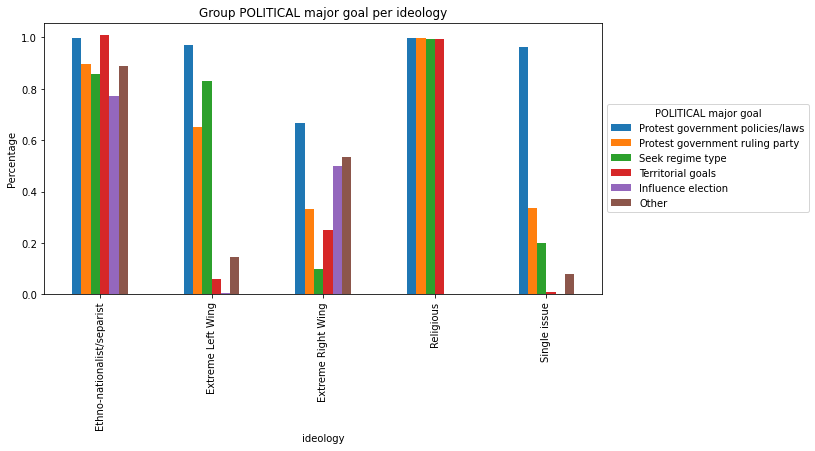

In [296]:
ideologies = {1: "Extreme Right Wing", 2: "Extreme Left Wing",
              3: "Religious", 4: "Ethno-nationalist/separist", 5: "Single issue"}
ideology_structure = {}

for i in range(5):
    ideology = ideologies[i+1]
    subset = df[df.dominant_ideology == i+1]
    total_known_structure = len(subset[subset.G_POL_1 != -99])
    for j in range(6):
        pol_goal = j+1
        if j != 5:
            ideology_structure[(ideology, pol_goal)] = len(
                subset[subset['G_POL_'+str(pol_goal)] == 1])/total_known_structure
        if j ==5:
            ideology_structure[(ideology, pol_goal)] = len(
            subset[subset['G_POL_OTH'] == 1])/total_known_structure
ideology_structure_df = pd.DataFrame(columns=['ideology', 'pol_goal', 'percentage'])
for key in ideology_structure:
    ideology_structure_df = ideology_structure_df.append({'ideology': key[0], 'pol_goal': key[1], 'percentage': ideology_structure[key]}, ignore_index=True)

ideology_structure_df.set_index(['ideology', 'pol_goal'], inplace=True)

# Now make a grouped bar chart with the percentages. The chart should not be stacked, the bars should be next to each other
ideology_structure_df.unstack().plot(kind='bar', stacked=False, figsize=(10, 5))
# Change the legend. The legend should be outside the plot, for each color we should display the structure (1: Hierarchical, 2: Networked, 3: Cell-like, 4: Fragmented, 5: Other)
# Change the content of the legend
plt.legend(title="POLITICAL major goal", loc='center left', bbox_to_anchor=(1, 0.5), labels=['Protest government policies/laws', 'Protest government ruling party', 'Seek regime type', 'Territorial goals', 'Influence election', 'Other'])
plt.title("Group POLITICAL major goal per ideology")
plt.ylabel("Percentage")
plt.show()

In [297]:
ideologies = {1: "Extreme Right Wing", 2: "Extreme Left Wing",
              3: "Religious", 4: "Ethno-nationalist/separist", 5: "Single issue"}
ideology_structure = {}

for i in range(5):
    ideology = ideologies[i+1]
    subset = df[df.dominant_ideology == i+1]
    total_known_structure = len(subset[subset.G_SOC_1 != -99])
    for j in range(3):
        soc_goal = j+1
        if j != 2:
            ideology_structure[(ideology, soc_goal)] = len(
                subset[subset['G_eco_'+str(soc_goal)] == 1])/total_known_structure
        if j ==2:
            ideology_structure[(ideology, soc_goal)] = len(
            subset[subset['G_SOC_OTH'] == 1])/total_known_structure

ideology_structure_df = pd.DataFrame(columns=['ideology', 'soc_goal', 'percentage'])
for key in ideology_structure:
    ideology_structure_df = ideology_structure_df.append({'ideology': key[0], 'soc_goal': key[1], 'percentage': ideology_structure[key]}, ignore_index=True)

ideology_structure_df.set_index(['ideology', 'soc_goal'], inplace=True)

# Now make a grouped bar chart with the percentages. The chart should not be stacked, the bars should be next to each other
ideology_structure_df.unstack().plot(kind='bar', stacked=False, figsize=(10, 5))
# Change the legend. The legend should be outside the plot, for each color we should display the structure (1: Hierarchical, 2: Networked, 3: Cell-like, 4: Fragmented, 5: Other)
# Change the content of the legend
plt.legend(title="SOCIAL major goal", loc='center left', bbox_to_anchor=(1, 0.5), labels=['Protest social discrimination/social justice issues', 'Protest public & private institutions', 'Other'])
plt.title("Group SOCIAL major goal per ideology")
plt.ylabel("Percentage")
plt.show()

KeyError: 'G_eco_1'

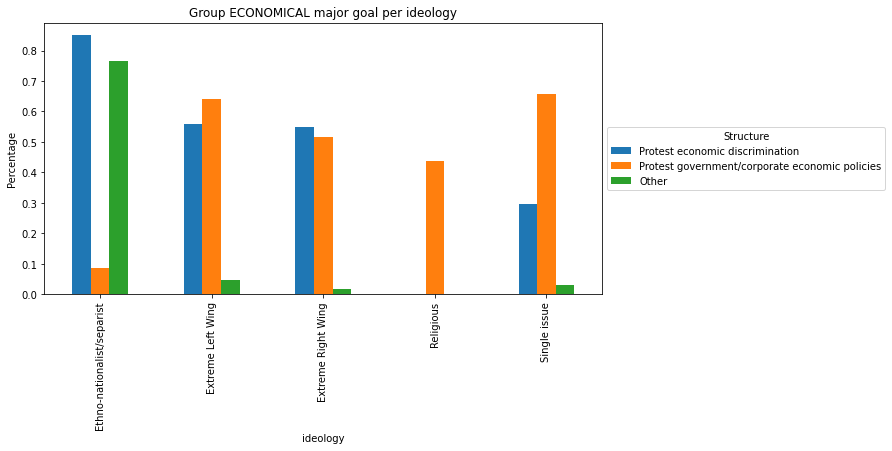

In [293]:
ideologies = {1: "Extreme Right Wing", 2: "Extreme Left Wing",
              3: "Religious", 4: "Ethno-nationalist/separist", 5: "Single issue"}
ideology_structure = {}

for i in range(5):
    ideology = ideologies[i+1]
    subset = df[df.dominant_ideology == i+1]
    total_known_structure = len(subset[subset.G_ECO_1 != -99])
    for j in range(3):
        eco_goal = j+1
        if j != 2:
            ideology_structure[(ideology, eco_goal)] = len(
                subset[subset['G_ECO_'+str(eco_goal)] == 1])/total_known_structure
        if j ==2:
            ideology_structure[(ideology, eco_goal)] = len(
            subset[subset['G_ECO_OTH'] == 1])/total_known_structure

ideology_structure_df = pd.DataFrame(columns=['ideology', 'eco_goal', 'percentage'])
for key in ideology_structure:
    ideology_structure_df = ideology_structure_df.append({'ideology': key[0], 'eco_goal': key[1], 'percentage': ideology_structure[key]}, ignore_index=True)

ideology_structure_df.set_index(['ideology', 'eco_goal'], inplace=True)

# Now make a grouped bar chart with the percentages. The chart should not be stacked, the bars should be next to each other
ideology_structure_df.unstack().plot(kind='bar', stacked=False, figsize=(10, 5))
# Change the legend. The legend should be outside the plot, for each color we should display the structure (1: Hierarchical, 2: Networked, 3: Cell-like, 4: Fragmented, 5: Other)
# Change the content of the legend
plt.legend(title="ECONOMICAL major goal", loc='center left', bbox_to_anchor=(1, 0.5), labels=['Protest economic discrimination', 'Protest government/corporate economic policies', 'Other'])
plt.title("Group ECONOMICAL major goal per ideology")
plt.ylabel("Percentage")
plt.show()

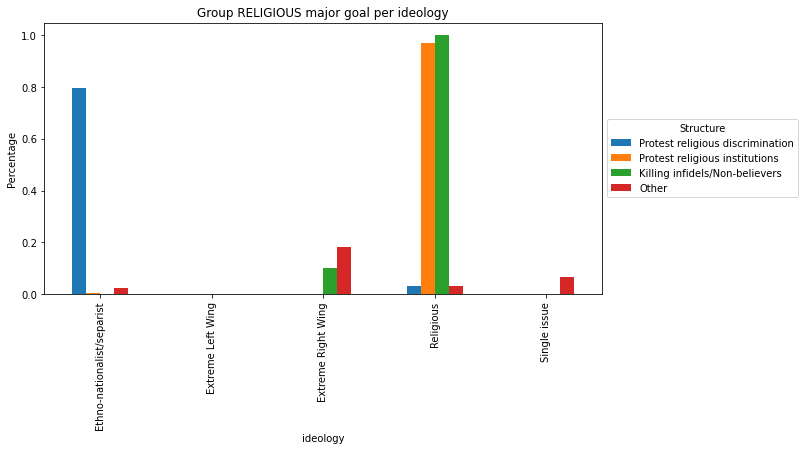

In [294]:
ideologies = {1: "Extreme Right Wing", 2: "Extreme Left Wing",
              3: "Religious", 4: "Ethno-nationalist/separist", 5: "Single issue"}
ideology_structure = {}

for i in range(5):
    ideology = ideologies[i+1]
    subset = df[df.dominant_ideology == i+1]
    total_known_structure = len(subset[subset.G_REL_1 != -99])
    for j in range(4):
        rel_goal = j+1
        if j != 3:
            ideology_structure[(ideology, rel_goal)] = len(
                subset[subset['G_REL_'+str(rel_goal)] == 1])/total_known_structure
        if j ==3:
            ideology_structure[(ideology, rel_goal)] = len(
            subset[subset['G_REL_OTH'] == 1])/total_known_structure

ideology_structure_df = pd.DataFrame(columns=['ideology', 'rel_goal', 'percentage'])
for key in ideology_structure:
    ideology_structure_df = ideology_structure_df.append({'ideology': key[0], 'rel_goal': key[1], 'percentage': ideology_structure[key]}, ignore_index=True)

ideology_structure_df.set_index(['ideology', 'rel_goal'], inplace=True)

# Now make a grouped bar chart with the percentages. The chart should not be stacked, the bars should be next to each other
ideology_structure_df.unstack().plot(kind='bar', stacked=False, figsize=(10, 5))
# Change the legend. The legend should be outside the plot, for each color we should display the structure (1: Hierarchical, 2: Networked, 3: Cell-like, 4: Fragmented, 5: Other)
# Change the content of the legend
plt.legend(title="RELIGIOUS major goal", loc='center left', bbox_to_anchor=(1, 0.5), labels=['Protest religious discrimination', 'Protest religious institutions', 'Killing infidels/Non-believers', 'Other'])
plt.title("Group RELIGIOUS major goal per ideology")
plt.ylabel("Percentage")
plt.show()

In [ ]:
df[total_col].groupby([df['nkill'], df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False).apply(lambda x: x['nkill']*x[total_col], axis=1)

### Plot 3:

In [192]:
MG_pol_col = df.columns[df.columns.str.startswith('G_POL') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE') & ~df.columns.str.endswith('TXT')]
MG_soc_col = df.columns[df.columns.str.startswith('G_SOC') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE')& ~df.columns.str.endswith('TXT')]
MG_eco_col = df.columns[df.columns.str.startswith('G_ECO') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE')& ~df.columns.str.endswith('TXT')]
MG_rel_col = df.columns[df.columns.str.startswith('G_REL') & ~df.columns.str.endswith('CI') & ~df.columns.str.endswith('SOURCE')& ~df.columns.str.endswith('TXT')] 

In [226]:
df[total_col].groupby([df['nkill'], df['iyear']]).sum().reset_index().sort_values(by=['iyear'], ascending=False).apply(lambda x: x['nkill']*x[total_col], axis=1)

,G_POL_1,G_POL_2,G_POL_3,G_POL_4,G_POL_5,G_POL_OTH,G_SOC_1,G_SOC_2,G_SOC_OTH,G_ECO_1,G_ECO_2,G_ECO_OTH,G_REL_1,G_REL_2,G_REL_3,G_REL_OTH
332,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,12.0,12.0,0.0
139,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,7.0,7.0,0.0
279,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0
98,6.0,6.0,6.0,6.0,4.0,4.0,6.0,0.0,6.0,6.0,2.0,4.0,4.0,0.0,0.0,0.0
51,10.0,4.0,9.0,3.0,3.0,5.0,9.0,6.0,5.0,9.0,6.0,3.0,3.0,0.0,0.0,0.0


In [230]:
df[total_col].groupby([df['nkill']]).sum().reset_index().apply(lambda x: x['nkill']*x[total_col], axis=1).sum()


G_POL_1      16684.0
G_POL_2      16529.0
G_POL_3      16397.0
G_POL_4      16038.0
G_POL_5       1805.0
G_POL_OTH     1995.0
G_SOC_1       2058.0
G_SOC_2         72.0
G_SOC_OTH     1847.0
G_ECO_1       1871.0
G_ECO_2       7766.0
G_ECO_OTH     1799.0
G_REL_1       5666.0
G_REL_2      10157.0
G_REL_3      14019.0
G_REL_OTH     3873.0
dtype: float64

In [232]:
total_col = MG_pol_col.append(MG_soc_col).append(MG_eco_col).append(MG_rel_col)
# count how many killed people happen in G_POL_1

# multiply the number of killed people with the number of attacks
df_dict = df[total_col].groupby([df['nkill']]).sum().reset_index().apply(lambda x: x['nkill']*x[total_col], axis=1).sum()

# plot a pie chart where the total is the sum of the number of killed people
fig = px.pie(df_dict, values=df_dict, names=total_col, title='Number of attacks per year per each group')
fig.show()


In [235]:
# correlation between total_col
df[total_col].corr()
# plot the correlation
fig = px.imshow(df[total_col].corr())
fig.show()

In [209]:
# plot the number of attacks per year per each group
total_col = MG_pol_col.append(MG_soc_col).append(MG_eco_col).append(MG_rel_col)

fig = px.bar(df[total_col].sum().reset_index(), x='index', y=0, title='Number of attacks per each major goal', log_y=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        
        l = 50,
        r = 50,
        b = 100,
        t = 100,
        pad = 4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()
        


# Analysis 1

THE DOMINANT IDEOLOGY CATEGORIES: <br>
-99= Uncertainty/conflicting information exists in available data<br> 
1= Extreme Right Wing (including all racist ideologies)<br>
2= Extreme Left Wing<br>
3= Religious<br>
4= Ethno-nationalist/Separatist<br>
5= Single Issue<br>

In [20]:
# create five new dataframes, one for each ideology
df_ethno_nationalist = df[df['dominant_ideology'] == 4]
df_religious = df[df['dominant_ideology'] == 3]
df_extreme_right = df[df['dominant_ideology'] == 1]
df_extreme_left = df[df['dominant_ideology'] == 2]
df_single_issue = df[df['dominant_ideology'] == 5]
df_uncertain = df[df['dominant_ideology'] == -99]

print('The sum of the number of attacks of each ideology is equal to the total number of attacks: ', df_ethno_nationalist.shape[0] + df_religious.shape[0] + df_extreme_right.shape[0] + df_extreme_left.shape[0] + df_single_issue.shape[0] + df_uncertain.shape[0] == df.shape[0])

The sum of the number of attacks of each ideology is equal to the total number of attacks:  True


In [ ]:
# rename the dominant_ideology row from the number to the ideology name in the df dataframe
df['dominant_ideology'] = df['dominant_ideology'].replace({1: 'extreme_right', 2: 'extreme_left', 3: 'religious', 4: 'ethno_nationalist', 5: 'single_issue', -99: 'uncertain'})

## Analysis of the ethno_nationalists
1. geographic analysis
2. time series of attacks over time
3. number of groups and the most important ones
4. 

In [ ]:
fig1 = px.scatter_geo(df, lat = 'latitude', lon = 'longitude',animation_frame = 'dominant_ideology' , projection="natural earth")
fig1.update_layout(title = 'attacks')
fig1.show()

NameError: name 'px' is not defined

In [ ]:
df_ethno_nationalist.columns

Index(['ORGNAME', 'dominant_ideology', 'eventid', 'iyear', 'imonth', 'iday',
       'approxdate', 'extended', 'resolution', 'country',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=137)

In [ ]:
# do a time series graphh of the number of attacks per year for each ideology
df_ethno_nationalist['iyear'] = df_ethno_nationalist['iyear'].astype(int)

fig2 = px.line(df_ethno_nationalist.groupby('iyear').count().reset_index(), x = 'iyear', y = 'eventid')
fig2.update_layout(title = 'ethno_nationalist attacks')

df_religious['iyear'] = df_religious['iyear'].astype(int)

fig3 = px.line(df_religious.groupby('iyear').count().reset_index(), x = 'iyear', y = 'eventid')
fig3.update_layout(title = 'religious attacks')

df_extreme_left['iyear'] = df_extreme_left['iyear'].astype(int)

fig3 = px.line(df_extreme_left.groupby('iyear').count().reset_index(), x = 'iyear', y = 'eventid')
fig3.update_layout(title = 'etreme left attacks')

df_extreme_right['iyear'] = df_extreme_right['iyear'].astype(int)

fig3 = px.line(df_extreme_right.groupby('iyear').count().reset_index(), x = 'iyear', y = 'eventid')
fig3.update_layout(title = 'extreme right attacks')

df_single_issue['iyear'] = df_single_issue['iyear'].astype(int)

fig3 = px.line(df_single_issue.groupby('iyear').count().reset_index(), x = 'iyear', y = 'eventid')
fig3.update_layout(title = 'single issue attacks')

df_uncertain['iyear'] = df_uncertain['iyear'].astype(int)

fig3 = px.line(df_uncertain.groupby('iyear').count().reset_index(), x = 'iyear', y = 'eventid')
fig3.update_layout(title = 'uncertain attacks')

fig4 = make_subplots(rows=2, cols=3, subplot_titles=("ethno_nationalist attacks", "religious attacks", "extreme left attacks", "extreme right attacks", "single issue attacks", "uncertain attacks"))

fig4.add_trace(
    go.Scatter(x=df_ethno_nationalist.groupby('iyear').count().reset_index()['iyear'], y=df_ethno_nationalist.groupby('iyear').count().reset_index()['eventid'], name = 'ethno_nationalist'),
    row=1, col=1
)

fig4.add_trace(
    go.Scatter(x=df_religious.groupby('iyear').count().reset_index()['iyear'], y=df_religious.groupby('iyear').count().reset_index()['eventid'], name = 'religious'),
    row=1, col=2
)

fig4.add_trace(
    go.Scatter(x=df_extreme_left.groupby('iyear').count().reset_index()['iyear'], y=df_extreme_left.groupby('iyear').count().reset_index()['eventid'], name = 'extreme left'),
    row=2, col=1
)

fig4.add_trace(
    go.Scatter(x=df_extreme_right.groupby('iyear').count().reset_index()['iyear'], y=df_extreme_right.groupby('iyear').count().reset_index()['eventid'], name = 'extreme right'),
    row=2, col=2
)

fig4.add_trace(
    go.Scatter(x=df_single_issue.groupby('iyear').count().reset_index()['iyear'], y=df_single_issue.groupby('iyear').count().reset_index()['eventid'], name = 'single issue'),
    row=1, col=3
)

fig4.add_trace(
    go.Scatter(x=df_uncertain.groupby('iyear').count().reset_index()['iyear'], y=df_uncertain.groupby('iyear').count().reset_index()['eventid'], name = 'uncertain'),
    row=2, col=3
)

fig4.update_layout(height=600, width=1000, title_text="Subplots")
fig4.show()

In [ ]:
# get the top 3 weapons used by each ideology
print(df_ethno_nationalist['weaptype1_txt'].value_counts().head(3))
print(df_religious['weaptype1_txt'].value_counts().head(3))
print(df_extreme_left['weaptype1_txt'].value_counts().head(3))
print(df_extreme_right['weaptype1_txt'].value_counts().head(3))
print(df_single_issue['weaptype1_txt'].value_counts().head(3))
print(df_uncertain['weaptype1_txt'].value_counts().head(3))

Explosives    1834
Firearms      1138
Incendiary     406
Name: weaptype1_txt, dtype: int64
Explosives    1420
Firearms       971
Unknown        231
Name: weaptype1_txt, dtype: int64
Explosives    274
Firearms       88
Incendiary     31
Name: weaptype1_txt, dtype: int64
Firearms      26
Explosives    21
Incendiary     9
Name: weaptype1_txt, dtype: int64
Incendiary    183
Explosives    178
Firearms       17
Name: weaptype1_txt, dtype: int64
Explosives    4
Incendiary    2
Firearms      1
Name: weaptype1_txt, dtype: int64


In [ ]:
# diplay the number of killed and wounded people by each ideology per attack
print(df_ethno_nationalist[['nkill', 'nwound']].sum() / df_ethno_nationalist.shape[0])
print(df_religious[['nkill', 'nwound']].sum() / df_religious.shape[0])
print(df_extreme_left[['nkill', 'nwound']].sum() / df_extreme_left.shape[0])
print(df_extreme_right[['nkill', 'nwound']].sum() / df_extreme_right.shape[0])
print(df_single_issue[['nkill', 'nwound']].sum() / df_single_issue.shape[0])
print(df_uncertain[['nkill', 'nwound']].sum() / df_uncertain.shape[0])

nkill     0.577110
nwound    1.297854
dtype: float64
nkill      5.150257
nwound    16.180382
dtype: float64
nkill     1.283721
nwound    1.320930
dtype: float64
nkill     0.311475
nwound    1.950820
dtype: float64
nkill     0.216867
nwound    0.351807
dtype: float64
nkill     0.500
nwound    0.375
dtype: float64


In [ ]:
# plot a time series of the nuumber of killed people annd wounded people by each ideology per year on the same graph with different lines per ideology

fig5 = make_subplots(rows=1, cols=1, subplot_titles=("ethno_nationalist attacks"))

fig5.add_trace(
    go.Scatter(x=df_ethno_nationalist.groupby('iyear').sum().reset_index()['iyear'], y=df_ethno_nationalist.groupby('iyear').sum().reset_index()['nkill'], name = 'ethno_nationalist'),
    row = 1, col = 1
)

fig5.add_trace(
    go.Scatter(x=df_religious.groupby('iyear').sum().reset_index()['iyear'], y=df_religious.groupby('iyear').sum().reset_index()['nkill'], name = 'religious'),
    row = 1, col = 1
)

fig5.add_trace(
    go.Scatter(x=df_extreme_left.groupby('iyear').sum().reset_index()['iyear'], y=df_extreme_left.groupby('iyear').sum().reset_index()['nkill'], name = 'extreme left'),
    row = 1, col = 1
)

fig5.add_trace(
    go.Scatter(x=df_extreme_right.groupby('iyear').sum().reset_index()['iyear'], y=df_extreme_right.groupby('iyear').sum().reset_index()['nkill'], name = 'extreme right'),
    row = 1, col = 1
)

fig5.add_trace(
    go.Scatter(x=df_single_issue.groupby('iyear').sum().reset_index()['iyear'], y=df_single_issue.groupby('iyear').sum().reset_index()['nkill'], name = 'single issue'),
    row = 1, col = 1
)

fig5.show()


In [ ]:
to_save = df_ethno_nationalist[['ORGNAME', 'iyear']].groupby('iyear').count().reset_index().rename(columns = {'ORGNAME': 'ethno_nationalist'})
to_save['religious'] = df_religious[['ORGNAME', 'iyear']].groupby('iyear').count().reset_index()['ORGNAME']
to_save['extreme_left'] = df_extreme_left[['ORGNAME', 'iyear']].groupby('iyear').count().reset_index()['ORGNAME']
to_save['extreme_right'] = df_extreme_right[['ORGNAME', 'iyear']].groupby('iyear').count().reset_index()['ORGNAME']
to_save['single_issue'] = df_single_issue[['ORGNAME', 'iyear']].groupby('iyear').count().reset_index()['ORGNAME']
to_save['uncertain'] = df_uncertain[['ORGNAME', 'iyear']].groupby('iyear').count().reset_index()['ORGNAME']
to_save.head()


,iyear,ethno_nationalist,religious,extreme_left,extreme_right,single_issue,uncertain
0,1970,44,1.0,65.0,3.0,5,1.0
1,1971,123,5.0,39.0,3.0,2,1.0
2,1972,268,7.0,13.0,2.0,8,2.0
3,1973,140,1.0,16.0,1.0,4,1.0
4,1974,141,2.0,19.0,1.0,21,2.0


In [ ]:
to_save.to_csv('ethno_nationalist.csv', index = False)